In [ ]:
!pip install scipy

In [28]:
import matplotlib.pyplot as plt  
from mpl_toolkits.basemap import Basemap  
import xarray as xr  
import numpy as np  
from scipy.ndimage import gaussian_filter  
#import netcdf4

In [11]:
# read file and pre-process
file=xr.open_dataset(r'.\3B-DAY.MS.MRG.3IMERG.20230101-S000000-E235959.V07B.nc4')

In [29]:
print(file)

<xarray.Dataset> Size: 117MB
Dimensions:                         (time: 1, lon: 3600, lat: 1800, nv: 2)
Coordinates:
  * lon                             (lon) float32 14kB -179.9 -179.9 ... 179.9
  * lat                             (lat) float64 14kB -89.95 -89.85 ... 89.95
  * time                            (time) datetime64[ns] 8B 2023-01-01
Dimensions without coordinates: nv
Data variables:
    precipitation                   (time, lon, lat) float32 26MB ...
    precipitation_cnt               (time, lon, lat) int8 6MB ...
    precipitation_cnt_cond          (time, lon, lat) int8 6MB ...
    MWprecipitation                 (time, lon, lat) float32 26MB ...
    MWprecipitation_cnt             (time, lon, lat) int8 6MB ...
    MWprecipitation_cnt_cond        (time, lon, lat) int8 6MB ...
    randomError                     (time, lon, lat) float32 26MB ...
    randomError_cnt                 (time, lon, lat) int8 6MB ...
    probabilityLiquidPrecipitation  (time, lon, lat) int8 6MB 

(1800, 3600)


(1,
 5,
 [-73.7252376471597, 40.9983924595292, 0.0, 0.0],
 [-71.7882488679261, 42.0474280397674, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x2d8424c7820>)

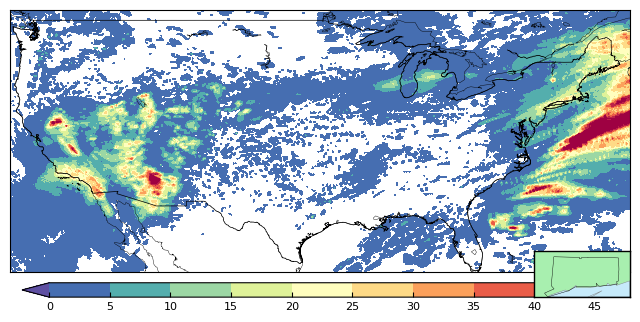

In [98]:
#main plot
fig, ax = plt.subplots(figsize=(8,8))  
m = Basemap(ax=ax,projection='cyl', llcrnrlat=25, urcrnrlat=50,  
            llcrnrlon=-125, urcrnrlon=-66, resolution='l')  
m.readshapefile(r'D:\5090\Dataset\SHP\cb_2018_us_nation_5m\cb_2018_us_nation_5m','conus', color='k',linewidth=0.5)  
m.drawcoastlines(linewidth=0.3, color='black')  
#m.fillcontinents(color=(168/255,239/255,175/255),lake_color=(198/255,234/255,250/255)) 
precip=file['precipitation']
longitude=file['lon']
latitude=file['lat']
precip = np.squeeze(precip)
precip = precip.where(precip >0)
precip = precip.transpose()
print(precip.shape)
precip = precip.astype('float16')
lons, lats = np.meshgrid(longitude, latitude)  
x, y = m(lons, lats)  # map projection  
cf=ax.contourf(x,y,precip,levels=np.arange(0,50,5),  
                            cmap='Spectral_r',extend='both')  
#c=ax.contour(x,y,precip,levels=np.arange(0,50,10),colors='b',linewidths=1)
ax_cb= fig.add_axes([0.14, 0.3, 0.75, 0.018])  
cb=plt.colorbar(cf,cax=ax_cb,shrink=0.0,  
                orientation='horizontal',format='%d')  
cb.ax.tick_params(labelsize=8, direction='in',labelcolor='k')

#subplot2: another frame
ax_scs = plt.axes([0.78, 0.214, 0.12, 0.23])  
m = Basemap(ax=ax_scs,projection='cyl', llcrnrlat=41, urcrnrlat=42.2,  
            llcrnrlon=-74, urcrnrlon=-71.5, resolution='l')  
m.drawcoastlines(linewidth=0.3, color='gray')  
m.fillcontinents(color=(168/255,239/255,175/255),lake_color=(198/255,234/255,250/255))  
m.drawmapboundary(fill_color=(198/255,234/255,250/255))  
m.readshapefile(r'D:\5090\Dataset\SHP\CT_shapefile\States_shapefile', 'CT', color='black',linewidth=0.3)

In [44]:
#tf=gaussian_filter(precip,2)  


In [45]:
#subplot1: colorbar


<Figure size 640x480 with 0 Axes>

(1800, 3600)


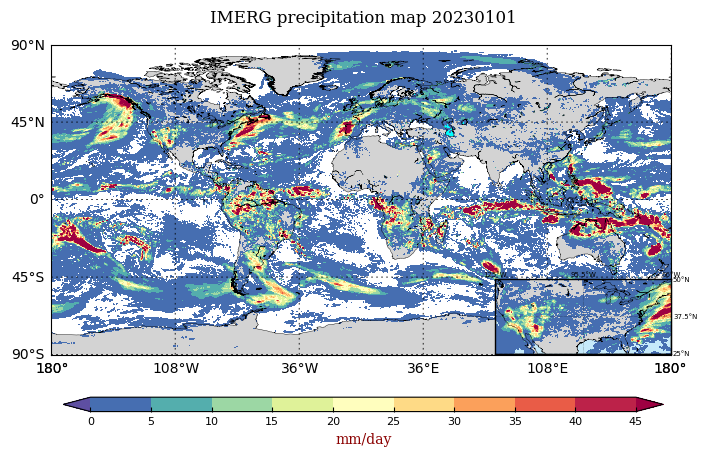

In [146]:
#main plot
precip=file['precipitation']
longitude=file['lon']
latitude=file['lat']
precip = np.squeeze(precip)
precip = precip.where(precip >0)
precip = precip.transpose()
print(precip.shape)
precip = precip.astype('float16')
lons, lats = np.meshgrid(longitude, latitude)  

fig, ax = plt.subplots(figsize=(8,8))  
m = Basemap(ax=ax,projection='cyl', llcrnrlat=-90, urcrnrlat=90,  
            llcrnrlon=-180, urcrnrlon=180, resolution='l')  
#m.readshapefile(r'D:\5090\Dataset\SHP\cb_2018_us_nation_5m\cb_2018_us_nation_5m','conus', color='k',linewidth=0.5)  
m.drawcoastlines(linewidth=0.3, color='black')  
m.fillcontinents(color='lightgray',lake_color='aqua')  

x, y = m(lons, lats)  # map projection  
cf=ax.contourf(x,y,precip,levels=np.arange(0,50,5),  
                            cmap='Spectral_r',extend='both')  

#c=ax.contour(x,y,precip,levels=np.arange(0,50,10),colors='b',linewidths=1)
parallels = np.linspace(-90,90,5)
m.drawparallels(parallels, labels=[1,0,0,0],linewidth=0.6,color='k',dashes=[2,4])
meridians = np.linspace(-180,180,6)
m.drawmeridians(meridians,labels=[0,0,0,1],linewidth=0.6,color='k',dashes=[2,4])
ax_cb= fig.add_axes([0.14, 0.23, 0.75, 0.018])  
cb=plt.colorbar(cf,cax=ax_cb,shrink=0.0,  
                orientation='horizontal',format='%d')  
cb.ax.tick_params(labelsize=8, direction='in',labelcolor='k')
font={'family':'serif','color':'darkred','weight':'normal','size':10}
cb.set_label('mm/day',fontdict=font)
title="IMERG precipitation map 20230101"
plt.title(title,fontdict={'family':'serif','color':'black','weight':'normal','size':12},loc='center', pad=270)

#subplot2: another frame
ax_scs = plt.axes([0.68, 0.234, 0.22, 0.23])  
m = Basemap(ax=ax_scs,projection='cyl', llcrnrlat=25, urcrnrlat=50,  
            llcrnrlon=-125, urcrnrlon=-66, resolution='l')  
m.drawcoastlines(linewidth=0.3, color='black')  
m.fillcontinents(color='lightgray',lake_color='aqua')  
m.drawmapboundary(fill_color=(198/255,234/255,250/255))  
parallels = np.linspace(25,50,3)
m.drawparallels(parallels, labels=[0,1,0,0],linewidth=0.3,color='k',dashes=[1,2],fontsize=5)
meridians = np.linspace(-125,-66,3)
m.drawmeridians(meridians,labels=[0,0,1,0],linewidth=0.3,color='k',dashes=[1,2],fontsize=5)
cf=ax_scs.contourf(x,y,precip,levels=np.arange(0,50,5),  
                            cmap='Spectral_r',extend='both')  
save_path=r'./rainfall_overlay.jpg'
plt.savefig(save_path,dpi=600)